In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

In [3]:
new_app_data = pd.read_csv('application_data.csv')
previous_app_data = pd.read_csv('previous_application.csv')

In [4]:
new_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
previous_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data interpretation

In [6]:
new_app_data.info(verbose=True , show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
#shape of the raw dataset of applications csv
new_app_data.shape

(307511, 122)

In [8]:
#CHECKING THE MISSING VALUES IN THE APPLICATIONS DF
new_app_data.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

In [9]:
#dropping all the columns which have missing% of >40%
new_app_data=new_app_data.loc[:,new_app_data.isnull().mean()<=0.4]

In [10]:
#new shape of the Application data after dropping the columns
new_app_data.shape

(307511, 73)

In [11]:
## checking for the missing columns
new_app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
F

In [12]:
#checking the missing percentages of the remaining columns
(new_app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'

The above columns are bot useful a they do not give any meaningful insights to the analysis, hence dropping the columns to clean the dataset further

In [13]:
#dropping columns that are not useful as the flag_document columns arennto useful as per the problem statement
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [14]:
new_app_data.drop(labels=unwanted,axis=1,inplace=True)

In [15]:
new_app_data.shape

(307511, 43)

In [16]:
##checking for rows with null values
emptyrow=new_app_data.isnull().sum(axis=1)

In [17]:
emptyrow.sort_values(ascending=False)

50536     12
166882    12
92687     12
54457     12
28438     12
          ..
132399     0
132401     0
132402     0
132403     0
307510     0
Length: 307511, dtype: int64

In [18]:
##since we have rows with ony 12 null values, we can impute those

In [19]:
new_app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
REG_CITY_NOT_LIVE_CITY             0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
REG_CITY_NOT_WORK_CITY             0
R

### Treating Missing Values

In [20]:
##we'll start with OCCUPATION_TYPE 

new_app_data.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [21]:
new_app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [22]:
new_app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [23]:
new_app_data.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

#### As we can observe that the OCCUPATION_TYPE has the mode as Labourers but we cannot be sure if all the null values will be labourers so it's better to leave it untouched


In [24]:
new_app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [25]:
#checking EXT_SOURCE_3  

new_app_data.EXT_SOURCE_3.isnull().sum()

60965

In [26]:
new_app_data.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [27]:
new_app_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:xlabel='EXT_SOURCE_3'>

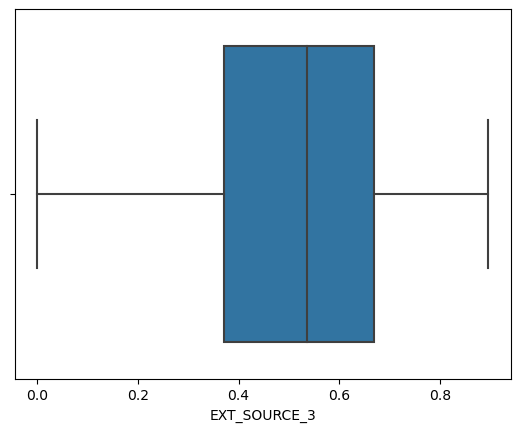

In [28]:
#checking outliers for EXT_SOURCE_3
sns.boxplot(x=new_app_data.EXT_SOURCE_3)

In [29]:
##it can be observed that the median and mean are same in EXT_SOURCE_3 hence imputing the values with mean willnot effect the anlysis negatively.

new_app_data.EXT_SOURCE_3.fillna(new_app_data.EXT_SOURCE_3.mean(),inplace=True)

In [30]:
new_app_data.EXT_SOURCE_3.isnull().sum()

0

In [31]:
new_app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

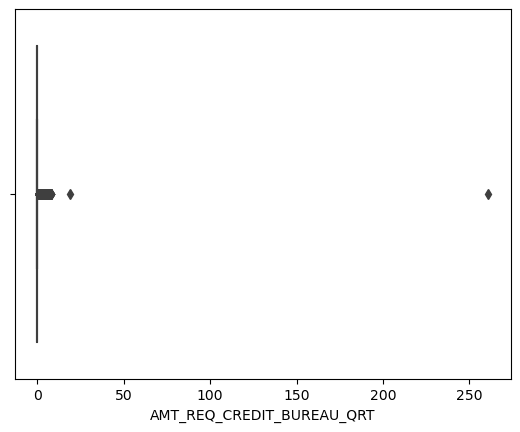

In [32]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_QRT)

In [33]:
new_app_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

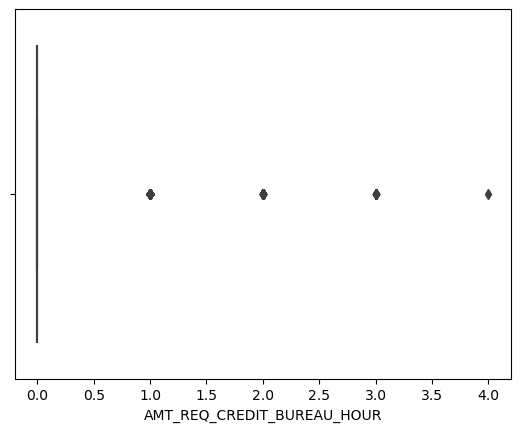

In [34]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()

In [35]:
new_app_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

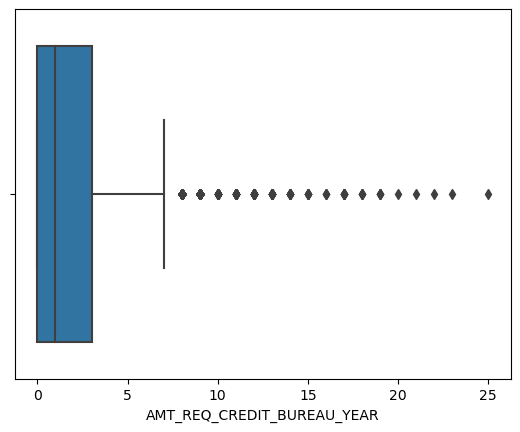

In [36]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [37]:
new_app_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

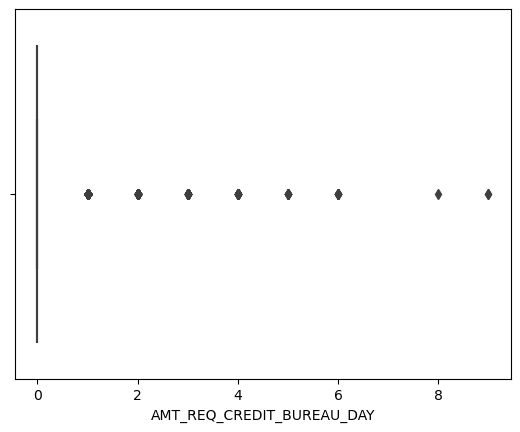

In [38]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

In [39]:
new_app_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

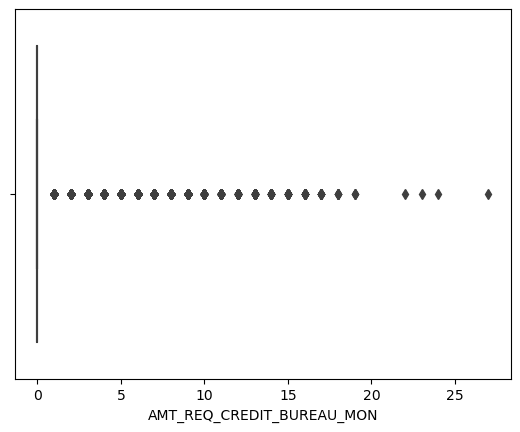

In [40]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

In [41]:
new_app_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

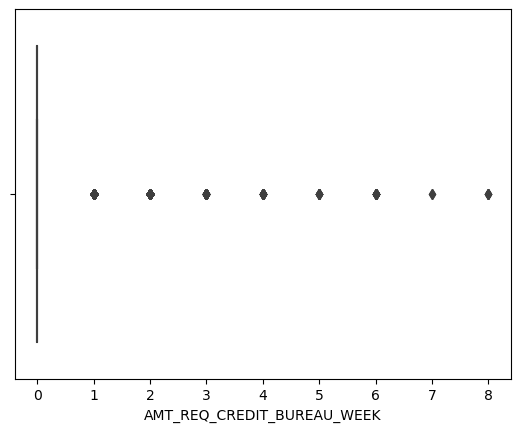

In [42]:
sns.boxplot(x=new_app_data.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

we can observe that the max and 75% have a major difference hence the max value can be effecting the mean, so we will impute the values using the mode

In [43]:
new_app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace=True)
new_app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace=True)
new_app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace=True)
new_app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace=True)
new_app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace=True)
new_app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(new_app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace=True)

In [44]:
new_app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_QRT          0
EXT_SOURCE_3                       0
AMT_REQ_CREDIT_BUREAU_MON          0
HOUR_APPR_PROCESS_START            0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
C

In [45]:
new_app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

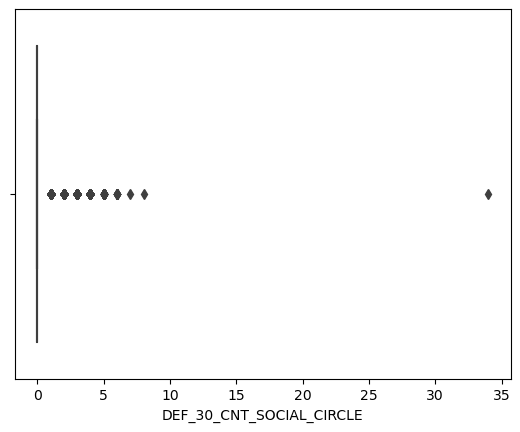

In [46]:
sns.boxplot(x=new_app_data.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [47]:
#dropping the values with null values in DEF_30_CNT_SOCIAL_CIRCLE 

new_app_data=new_app_data[~new_app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]

In [48]:
new_app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96066
NAME_TYPE_SUITE                 1292
EXT_SOURCE_2                     656
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
AMT_REQ_CREDIT_BUREAU_QRT          0
EXT_SOURCE_3                       0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_30_CNT_SOCIAL_CIRCLE           0
AMT_REQ_CREDIT_BUREAU_MON          0
HOUR_APPR_PROCESS_START            0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
C

In [49]:
new_app_data.EXT_SOURCE_2.isnull().sum()

656

In [50]:
new_app_data.EXT_SOURCE_2.describe()

count    3.058340e+05
mean     5.142629e-01
std      1.910940e-01
min      8.173617e-08
25%      3.922345e-01
50%      5.658218e-01
75%      6.635475e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

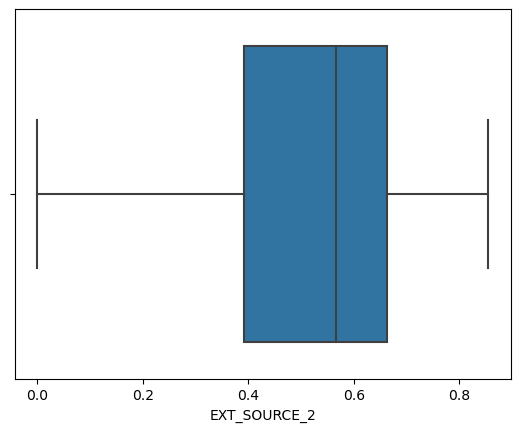

In [51]:
sns.boxplot(x=new_app_data['EXT_SOURCE_2'])
plt.show()

In [52]:
##it can be observed that the median and mean are same in EXT_SOURCE_2 hence imputing the values with mean will not effect the anlysis negatively.

new_app_data.loc[new_app_data['EXT_SOURCE_2'].isnull(), 'EXT_SOURCE_2']=new_app_data.EXT_SOURCE_2.mean()
# imp_val.loc[imp_val['EXT_SOURCE_3'].isnull(), 'EXT_SOURCE_3'] = imp_val['EXT_SOURCE_3'].mean()


In [53]:
new_app_data.EXT_SOURCE_2.isnull().sum()

0

In [54]:
new_app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96066
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
AMT_REQ_CREDIT_BUREAU_QRT          0
EXT_SOURCE_3                       0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_30_CNT_SOCIAL_CIRCLE           0
AMT_REQ_CREDIT_BUREAU_MON          0
HOUR_APPR_PROCESS_START            0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
C

NAME_TYPE_SUITE	Who was accompanying client when he was applying for the loan
since NAME_TYPE_SUITE will not be useful for the further analysis, we'll drop the column

In [55]:
#dropping NAME_TYPE_SUITE  column
new_app_data = new_app_data.loc[:, new_app_data.columns != 'NAME_TYPE_SUITE ']

In [56]:
new_app_data.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19040,122205,0,Cash loans,F,N,Y,0,180000.0,722430.0,23305.5,517500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-20647,-3256,-14786.0,-4204,Laborers,FRIDAY,12,0,0,0,0,0,0,Self-employed,0.660402,0.746300,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
76867,189134,0,Cash loans,M,Y,Y,0,157050.0,364896.0,16200.0,315000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20702,365243,-7181.0,-4193,NaN,THURSDAY,9,0,0,0,0,0,0,XNA,0.546099,0.588488,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
231030,367596,0,Cash loans,M,N,N,0,270000.0,405000.0,11605.5,405000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.014464,-19534,-2574,-6064.0,-2992,Cooking staff,TUESDAY,15,0,0,0,0,0,0,Other,0.484825,0.501075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139999,262338,1,Cash loans,F,N,Y,0,360000.0,1773963.0,61789.5,1620000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-16521,-3246,-5459.0,-47,Managers,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.568345,0.334454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
112562,230572,0,Cash loans,F,N,Y,1,90000.0,566055.0,18387.0,472500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010643,-11070,-2977,-1413.0,-1467,Medicine staff,MONDAY,14,0,0,0,0,0,0,Kindergarten,0.054684,0.245851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
262201,403512,0,Cash loans,F,N,N,2,63000.0,332946.0,16015.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.019101,-10228,-1790,-4673.0,-1319,Laborers,SUNDAY,11,0,0,0,0,1,1,Self-employed,0.249433,0.740799,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
145135,268293,1,Cash loans,M,Y,Y,1,135000.0,1125000.0,33025.5,1125000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.002134,-13545,-717,-2036.0,-641,Managers,TUESDAY,13,0,0,0,0,0,0,Agriculture,0.040961,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
14730,117188,1,Cash loans,M,N,N,0,126000.0,495000.0,17910.0,495000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,With parents,0.008019,-12262,-663,-4462.0,-4323,IT staff,SUNDAY,14,0,0,0,0,1,1,Medicine,0.013161,0.304672,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
223259,358589,0,Revolving loans,F,Y,Y,2,90000.0,270000.0,13500.0,270000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.026392,-9535,-1270,-2196.0,-2175,Medicine staff,WEDNESDAY,12,0,0,0,0,0,0,Medicine,0.686354,0.662638,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
205499,338207,0,Cash loans,M,N,Y,0,90000.0,380533.5,16893.0,328500.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.020713,-22957,365243,-5646.0,-4596,NaN,SATURDAY,6,0,0,0,0,0,0,XNA,0.450687,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
### we can see that some columns have XNA and XAP values, we can assume that the candidate did not prefer to provide the information

In [58]:
for column in new_app_data.columns:

    # Checking if the column contains any instances of "XNA"
    if "XNA" in new_app_data[column].values:

        print(f"Column '{column}' contains 'XNA'")

Column 'CODE_GENDER' contains 'XNA'
Column 'ORGANIZATION_TYPE' contains 'XNA'


C:\Users\ammym\AppData\Local\Temp\ipykernel_5456\947899201.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "XNA" in new_app_data[column].values:


In [59]:
new_app_data['CODE_GENDER'].value_counts()

F      201793
M      104693
XNA         4
Name: CODE_GENDER, dtype: int64

In [60]:
new_app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67726
XNA                       55202
Self-employed             38293
Other                     16635
Medicine                  11150
Business Entity Type 2    10517
Government                10381
School                     8878
Trade: type 7              7814
Kindergarten               6856
Construction               6699
Business Entity Type 1     5954
Transport: type 4          5384
Trade: type 3              3480
Industry: type 9           3356
Industry: type 3           3272
Security                   3240
Housing                    2954
Industry: type 11          2694
Military                   2628
Bank                       2482
Agriculture                2450
Police                     2336
Transport: type 2          2198
Postal                     2148
Security Ministries        1966
Trade: type 2              1890
Restaurant                 1805
Services                   1572
University                 1316
Industry: type 7           1303
Transpor

Here we can observe that the ORGANIZATION_TYPE and CODE_GENDER have 55202 and 4 XNA values

In [61]:
# dropping the rows with XNA 
new_app_data = new_app_data[new_app_data['CODE_GENDER']!='XNA']

In [62]:
new_app_data['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [63]:
new_app_data = new_app_data[new_app_data['ORGANIZATION_TYPE']!='XNA']

In [64]:
new_app_data.ORGANIZATION_TYPE

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307504             Self-employed
307506                  Services
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 251284, dtype: object

In [65]:
#Changing DAY_BIRTH to AGE for better analysis

In [66]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
new_app_data['AGE'] = abs(new_app_data['DAYS_BIRTH']//365)

In [67]:
# Drop 'DAYS_BIRTH' column
new_app_data = new_app_data.drop(['DAYS_BIRTH'],axis=1)

In [68]:
new_app_data.shape

(251284, 43)

After cleaning the Applications csv, the currentshape of the dataframe is  (251284, 43)



### Checking for data imbalance

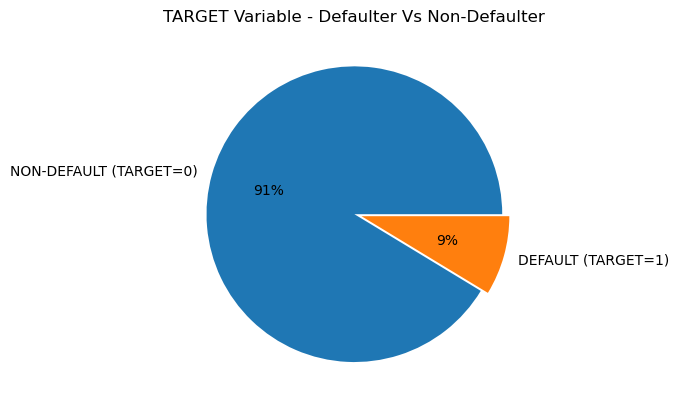

In [69]:
plt.pie(new_app_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - Defaulter Vs Non-Defaulter')
plt.show()


## Analysis

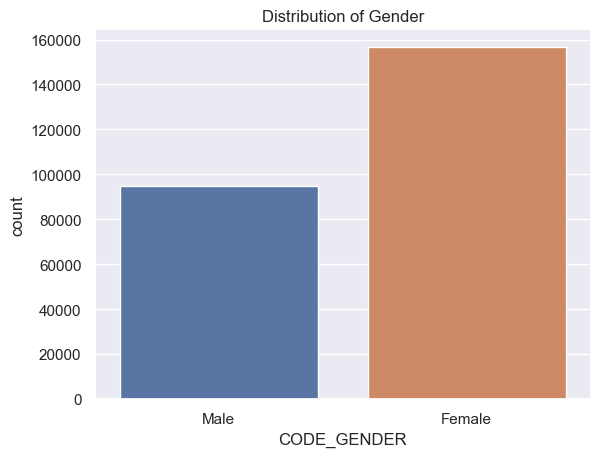

In [70]:
sns.set(style="darkgrid")
sns.countplot(x = new_app_data.CODE_GENDER)
plt.title('Distribution of Gender')
plt.show()

Points to be noted from above graph

-Female counts are higher than male

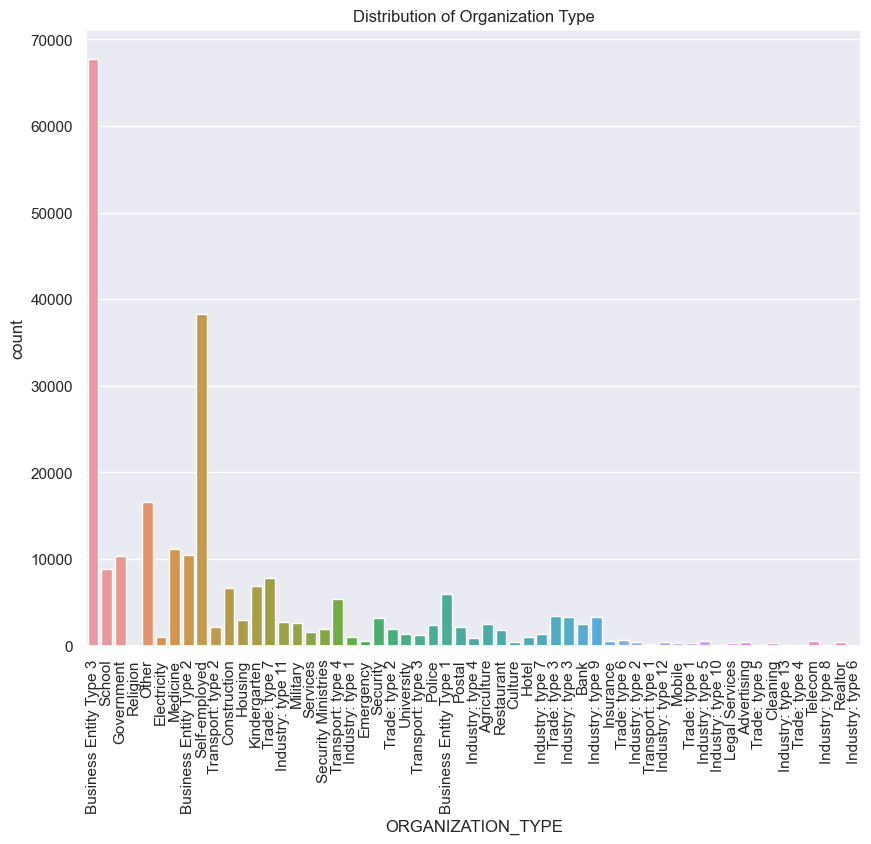

In [71]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.title('Distribution of Organization Type')
plt.show()

Points to be taken from the above graph:
    - Business Entity - type 3 has comparatively greater count followed by self employed

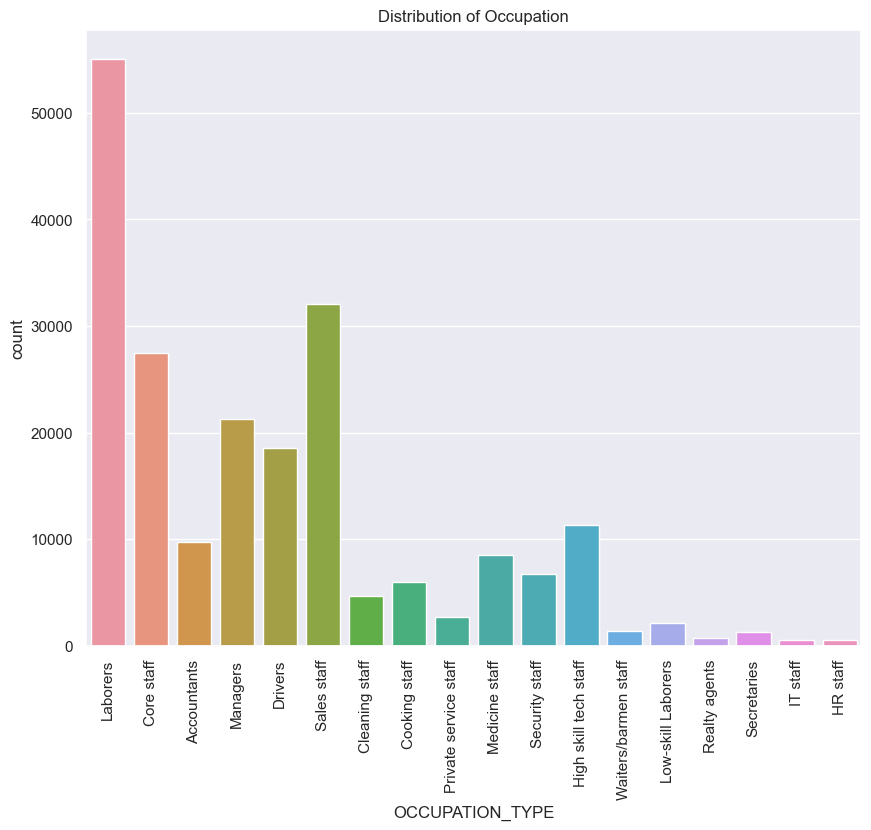

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.title('Distribution of Occupation')
plt.show()

Laborers have high count

In [73]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
new_app_data['AMT_CREDIT_RANGE']=pd.cut(new_app_data['AMT_CREDIT'],bins=bins,labels=slots)

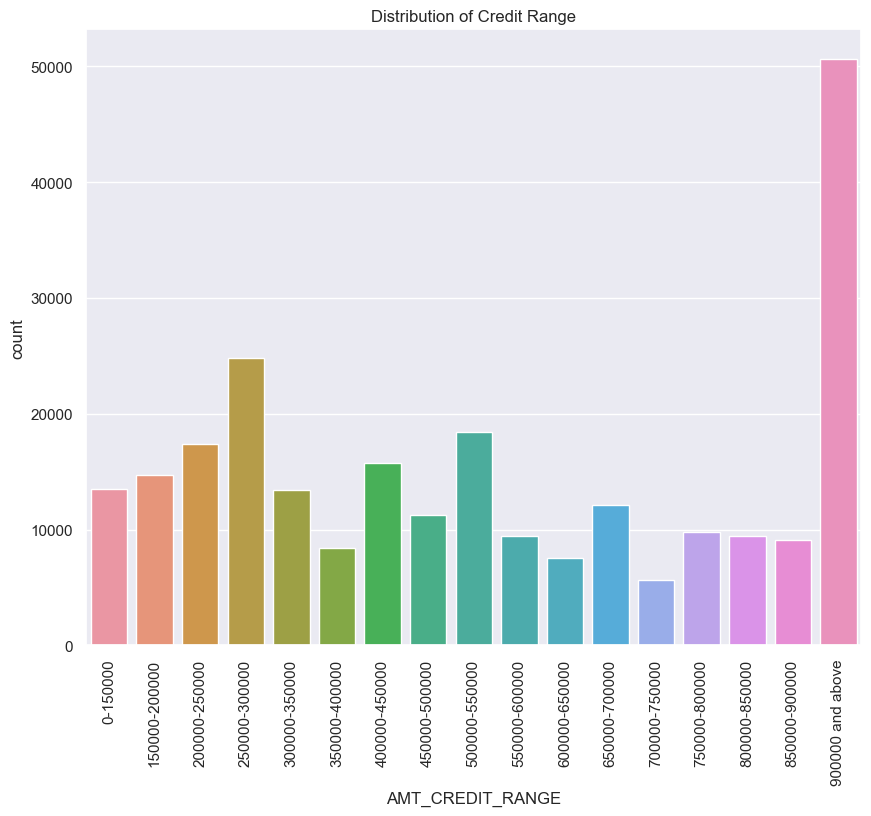

In [74]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.AMT_CREDIT_RANGE)
plt.xticks(rotation=90)
plt.title('Distribution of Credit Range')
plt.show()

In [75]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

new_app_data['AMT_INCOME_RANGE']=pd.cut(new_app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

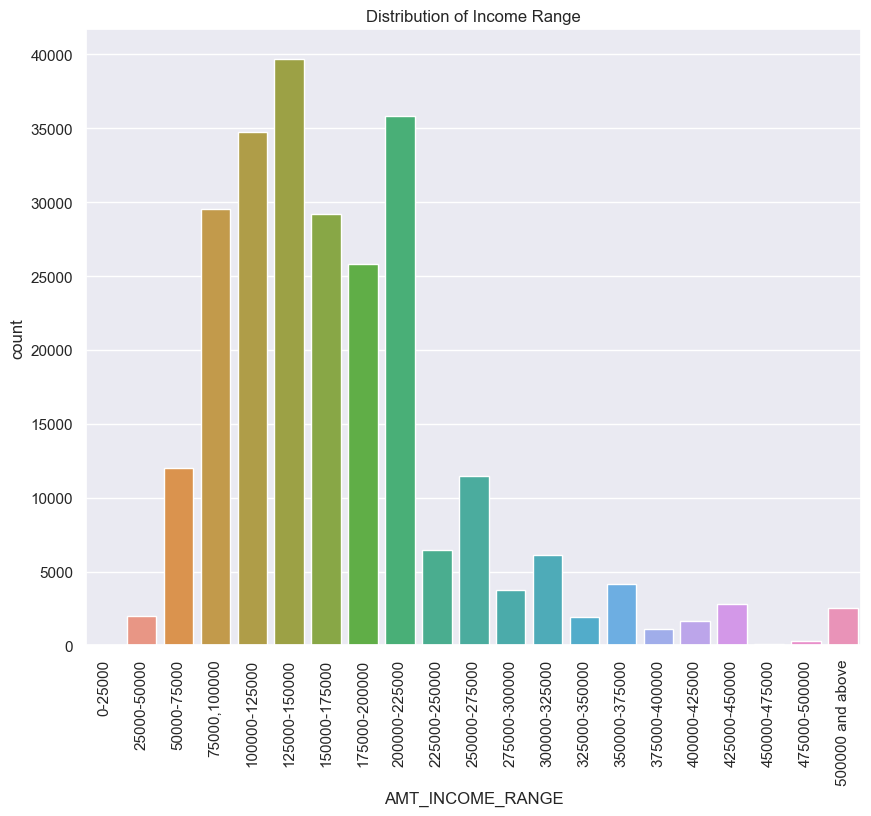

In [76]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.AMT_INCOME_RANGE)
plt.xticks(rotation=90)
plt.title('Distribution of Income Range')
plt.show()

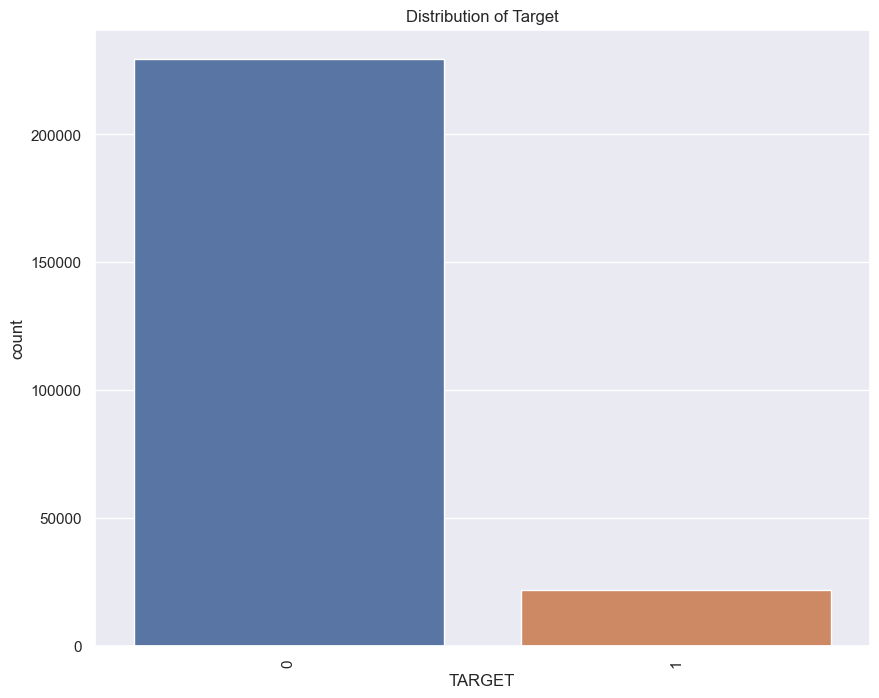

In [77]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.TARGET)
plt.xticks(rotation=90)
plt.title('Distribution of Target')
plt.show()

The above graph shows that there is a count of 200k+ that are non-defaulters

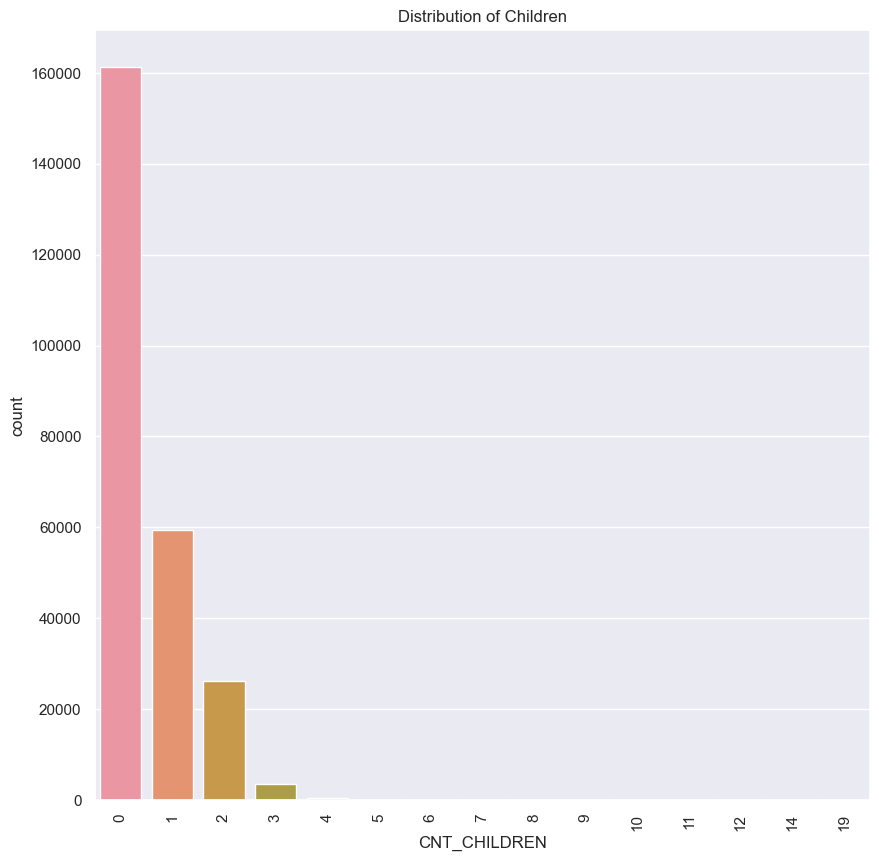

In [78]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
sns.countplot(x = new_app_data.CNT_CHILDREN)
plt.xticks(rotation=90)
plt.title('Distribution of Children')
plt.show()

We can see observe that the count is more where the applicants have 0 children

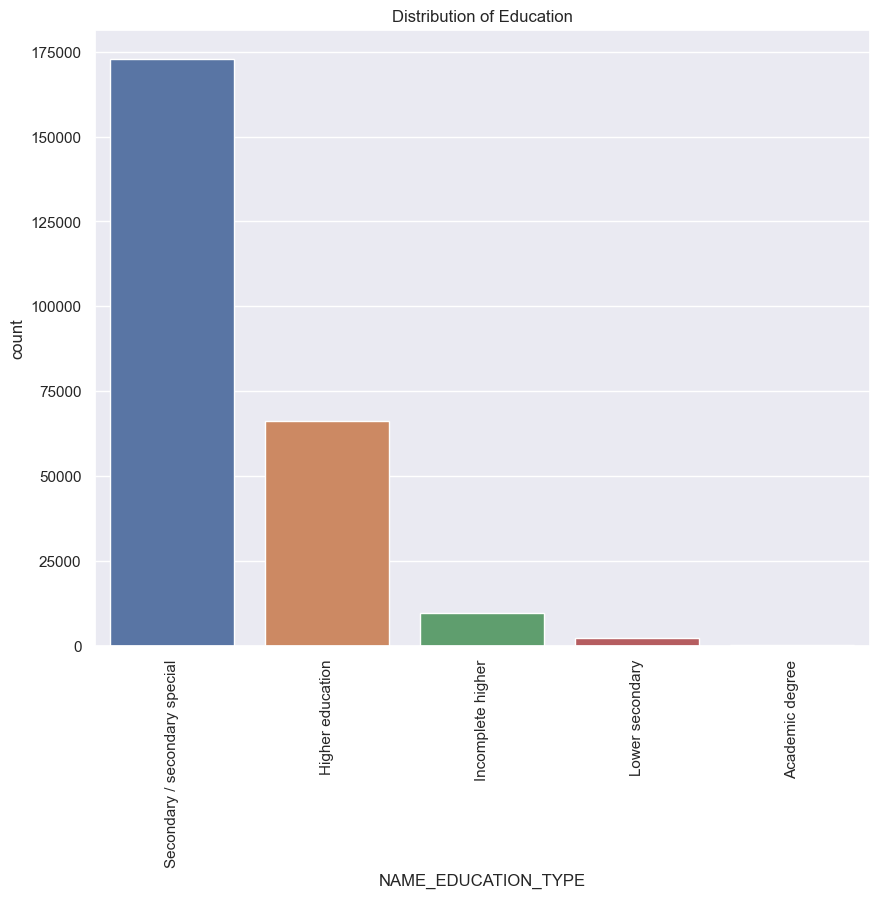

In [79]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x = new_app_data.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.title('Distribution of Education')
plt.show()





We can observe that the count is comparatively more in Secondary /Secondary special education

In [80]:
## Let's analyse the dataframe in reference to Target column i.e Defaulter and Non-Defaulters

In [81]:
new_app_data_0 = new_app_data[new_app_data['TARGET'] == 0]
new_app_data_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,900000 and above,250000-275000
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,0-150000,50000-75000
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,300000-350000,125000-150000
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,500000-550000,100000-125000
5,100008,0,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,-477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,47,450000-500000,"75000,100000"


In [82]:
new_app_data_1 = new_app_data[new_app_data['TARGET'] == 1]
new_app_data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,400000-450000,200000-225000
26,100031,1,Cash loans,Female,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-2628,-6573.0,-1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,52,900000 and above,100000-125000
40,100047,1,Cash loans,Male,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,48,900000 and above,200000-225000
42,100049,1,Cash loans,Female,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-3597,-45.0,-4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,37,250000-300000,125000-150000
94,100112,1,Cash loans,Male,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-2015,-4802.0,-1038,NaN,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,28,900000 and above,300000-325000


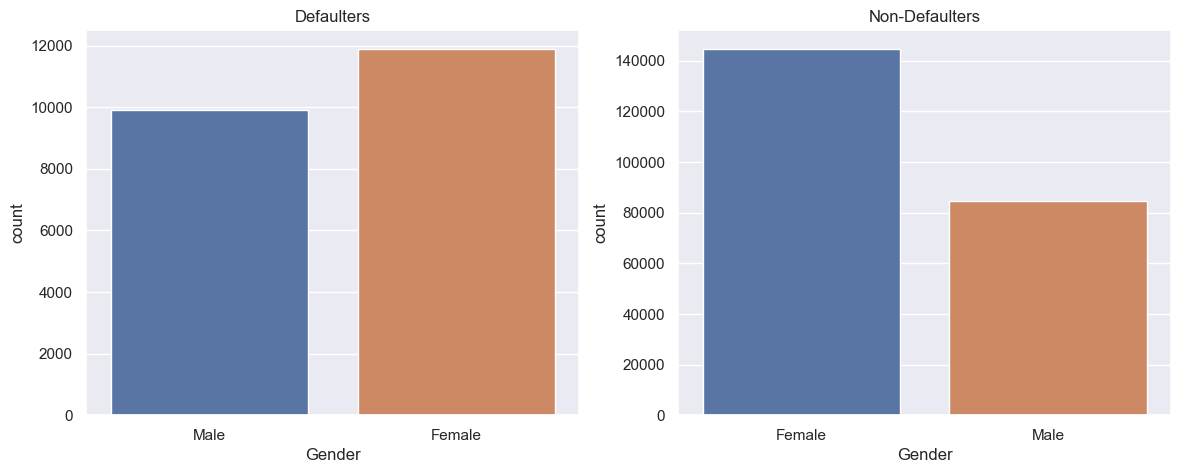

In [83]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=new_app_data_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=new_app_data_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

plt.show()

[Text(0.5, 0, 'Loan type')]

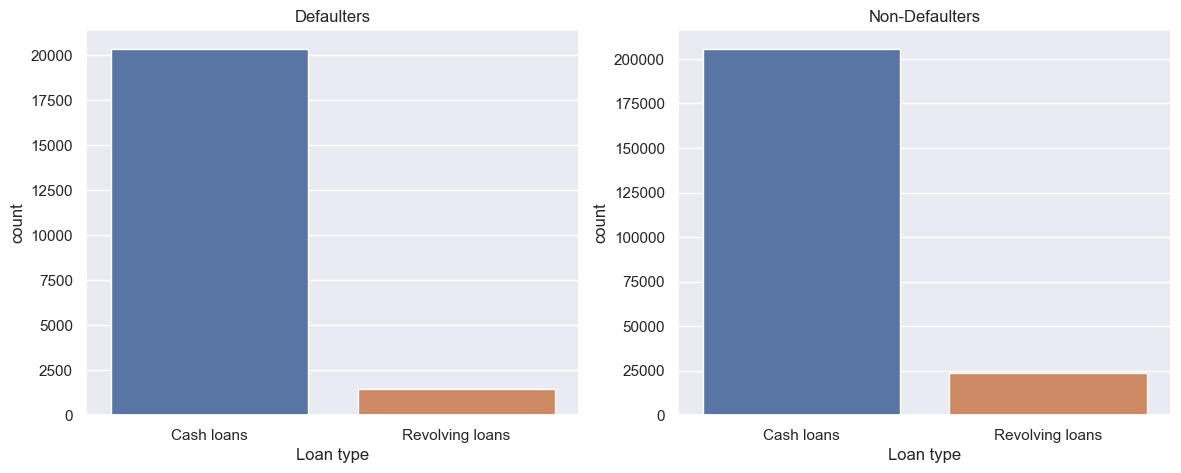

In [84]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=new_app_data_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=new_app_data_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

by above analysis we can observe that the Cash loans are more as compared to revolving loan in both cases

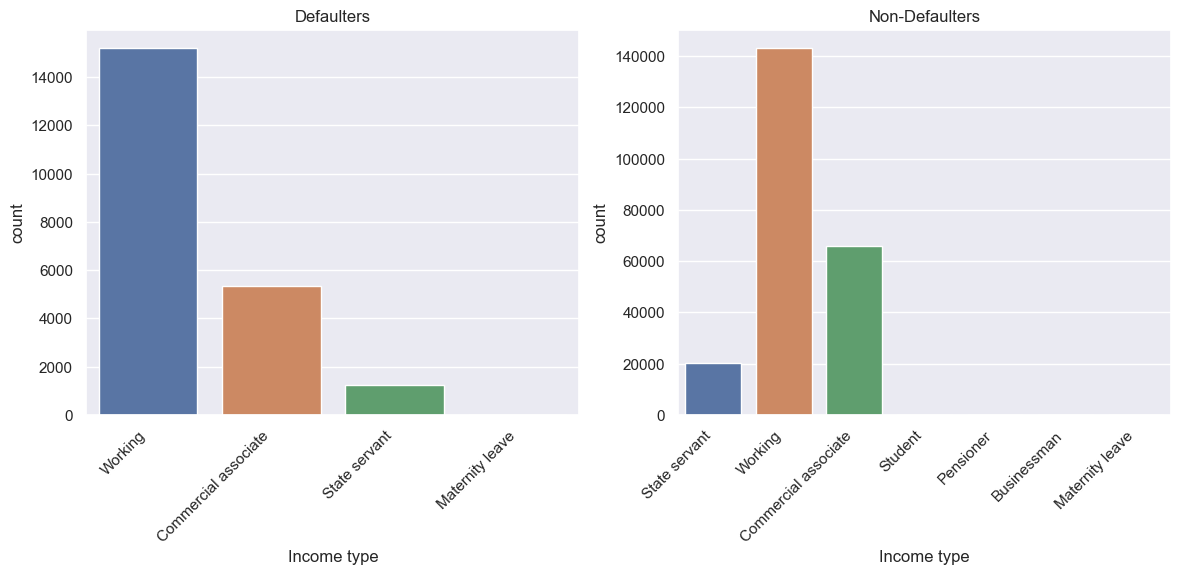

In [85]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=new_app_data_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=new_app_data_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In both the cases, 'working' are higher in numbers.

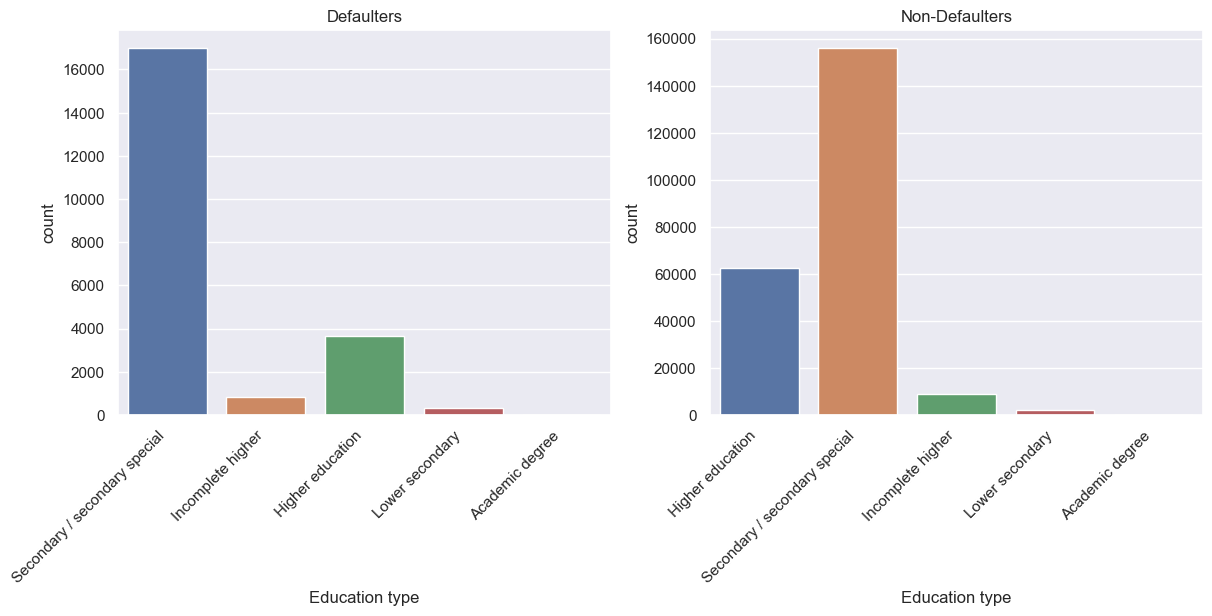

In [86]:
#On the basis of Education type

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=new_app_data_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=new_app_data_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Here in both the cases ' Secondary/Secondary special' higher in number folowed by 'Higher education'

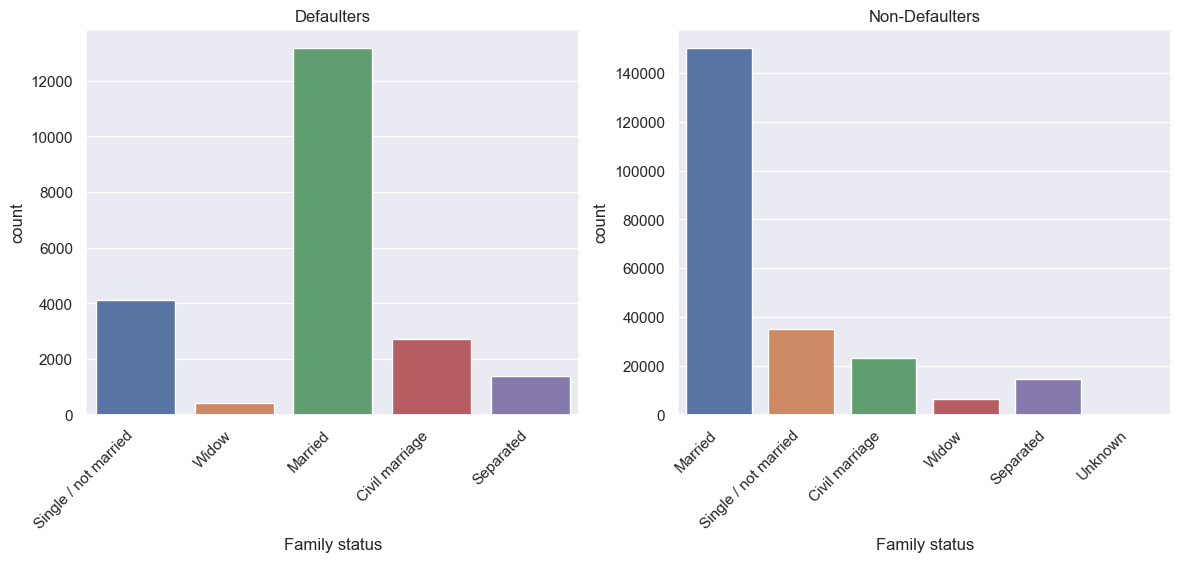

In [87]:
#Basis of Marital Status

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=new_app_data_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=new_app_data_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In both the cases, married headcount is more as compared to others

### Univariate analysis for continious variables

#Defaulters and non-defaulters on the basis of credit amount of the loan

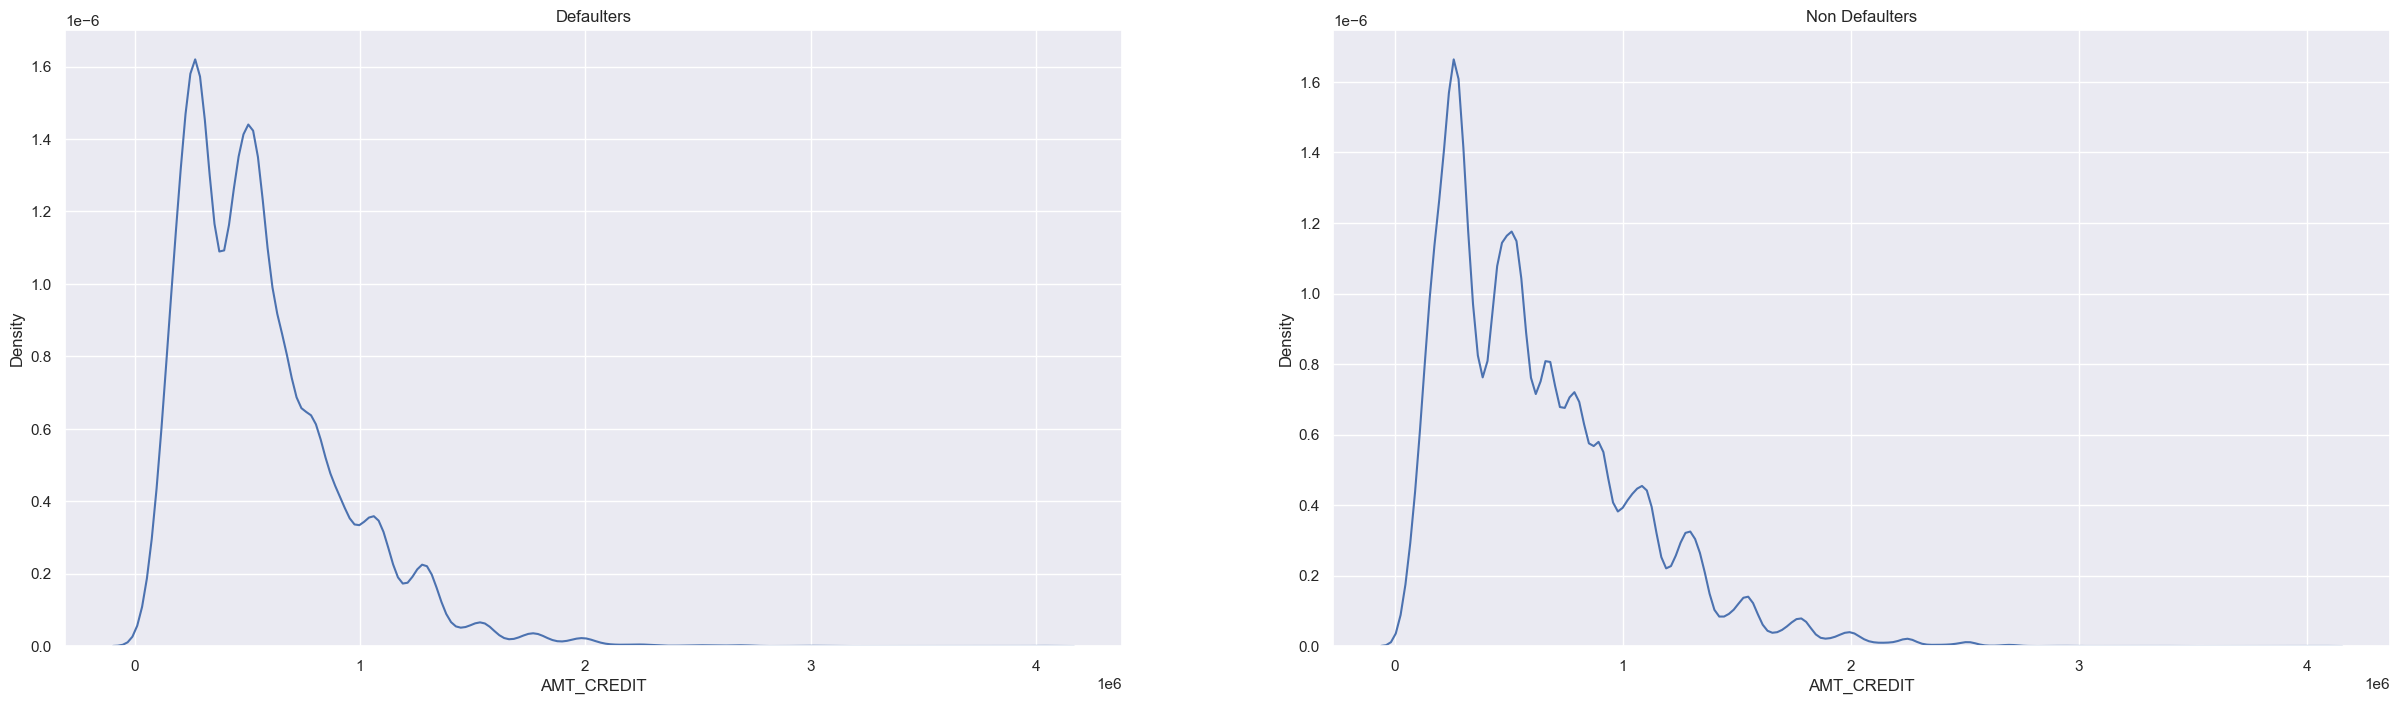

In [88]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.kdeplot(new_app_data_1['AMT_CREDIT'])

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.kdeplot(new_app_data_0['AMT_CREDIT'])

plt.show()

We can notice that the lesser the credit amount of the loan, the more chances of being defaulter
If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

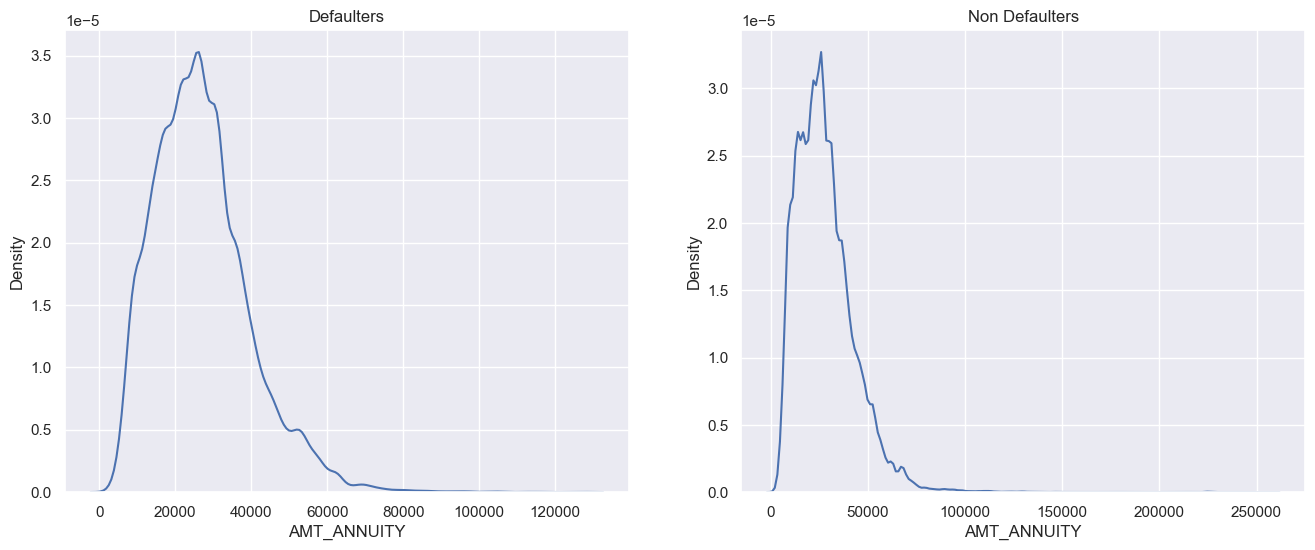

In [89]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.kdeplot(new_app_data_1['AMT_ANNUITY'])

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.kdeplot(new_app_data_0['AMT_ANNUITY'])

We can observe that the Loan Annuity is concentrated around 25k-30k in both the cases

### Bivariate Analysis

In [90]:
# Listing the relevant columns for finding corelation
corr_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']

In [91]:
# correlation for defaulters

# Creating dataframe for numerical columns
corr_target_1 = new_app_data_1[corr_col]
corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
0,202500.0,406597.5,24700.5,351000.0,26
26,112500.0,979992.0,27076.5,702000.0,52
40,202500.0,1193580.0,35028.0,855000.0,48
42,135000.0,288873.0,16258.5,238500.0,37
94,315000.0,953460.0,64107.0,900000.0,28


In [92]:
# Corelation matrix
corr_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
AMT_INCOME_TOTAL,1.000000,0.036458,0.043336,0.036068,0.007750
AMT_CREDIT,0.036458,1.000000,0.748398,0.982794,0.189529
AMT_ANNUITY,0.043336,0.748398,1.000000,0.749146,0.090292
AMT_GOODS_PRICE,0.036068,0.982794,0.749146,1.000000,0.185609
AGE,0.007750,0.189529,0.090292,0.185609,1.000000


<AxesSubplot:>

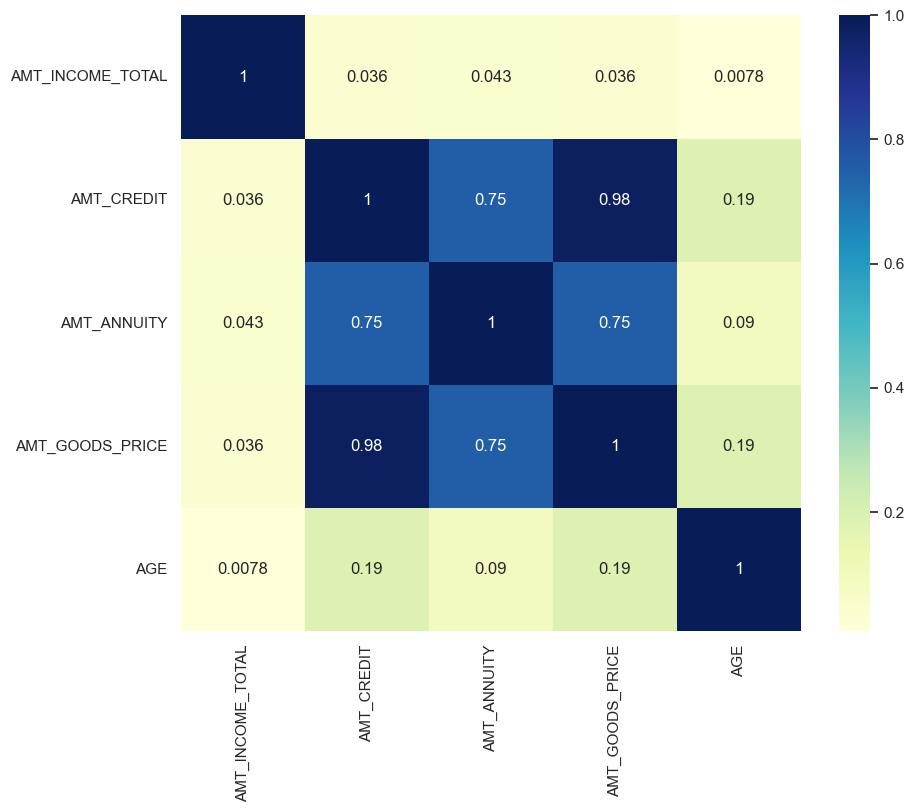

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_target_1.corr(),cmap="YlGnBu",annot=True)

Highly Correlated in defaulters

-AMT_GOODS_PRICE and AMT_CREDIT 


-AMT_CREDIT and AMT_ANNUITY


In [94]:
corr_target_0 = new_app_data_0[corr_col]
corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
1,270000.0,1293502.5,35698.5,1129500.0,46
2,67500.0,135000.0,6750.0,135000.0,53
3,135000.0,312682.5,29686.5,297000.0,53
4,121500.0,513000.0,21865.5,513000.0,55
5,99000.0,490495.5,27517.5,454500.0,47


In [95]:
corr_target_0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
AMT_INCOME_TOTAL,1.000000,0.326013,0.400393,0.332811,0.045359
AMT_CREDIT,0.326013,1.000000,0.761298,0.986724,0.152760
AMT_ANNUITY,0.400393,0.761298,1.000000,0.766065,0.091412
AMT_GOODS_PRICE,0.332811,0.986724,0.766065,1.000000,0.146900
AGE,0.045359,0.152760,0.091412,0.146900,1.000000


<AxesSubplot:>

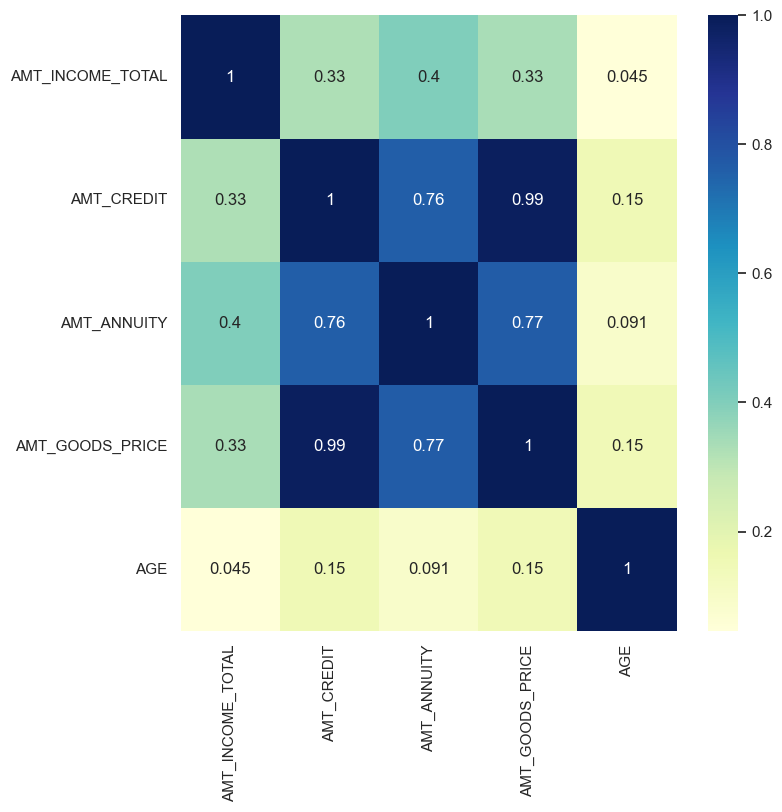

In [96]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_target_0.corr(),cmap="YlGnBu",annot=True)

Highly Correlated in non-defaulters

-AMT_GOODS_PRICE and AMT_CREDIT 


-AMT_CREDIT and AMT_ANNUITY


Text(0, 0.5, 'Defaulters')

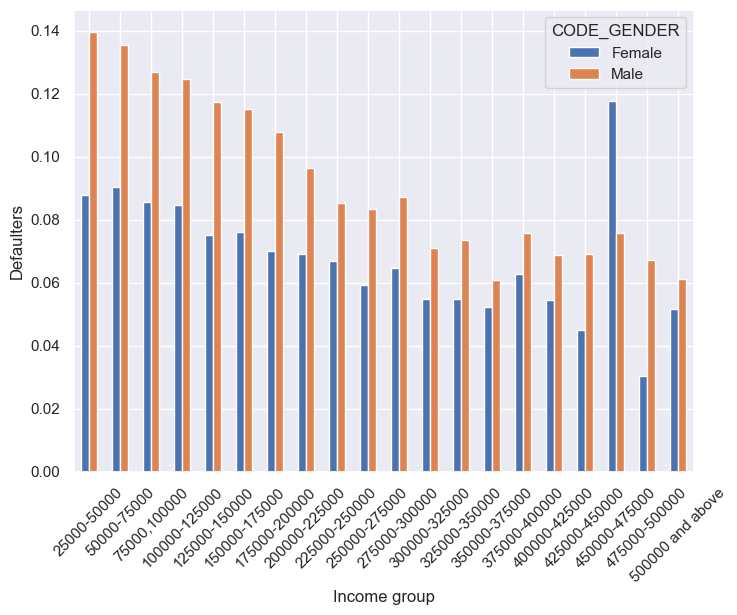

In [97]:
new_app_data.pivot_table(values='TARGET',index='AMT_INCOME_RANGE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

From the above graph we can observe that the number of defaulters are in high numbers with Male.

Text(0, 0.5, 'Defaulters')

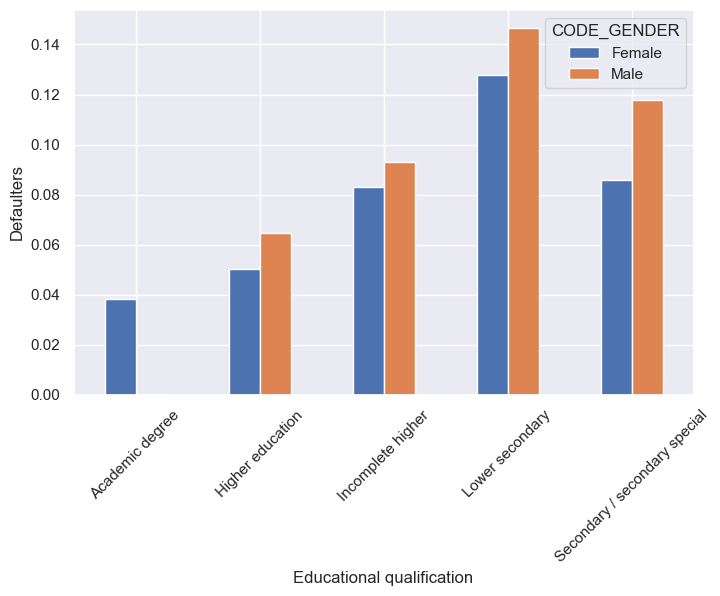

In [98]:
# Between Education group and Gender
new_app_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

Lower secondary crowd is more likely to default as compared to other categories

Text(0, 0.5, 'Defaulters')

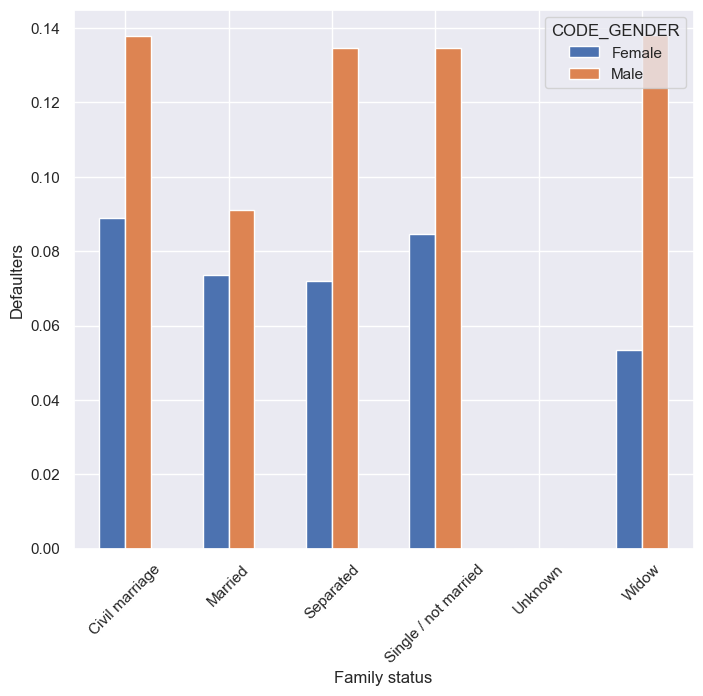

In [99]:
new_app_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

Here we can also observe that the male applicants are more likely to be a defaulter in all cases.
It can also be observed that the applicants from both the genders are more likely to default if they are in civil marriage

### For previous application

In [100]:
previous_app_data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [101]:
#Checking for the missing % of the values

(previous_app_data.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [102]:
# we will drop the columns which has the missing % >=40

previous_app_data=previous_app_data.loc[:,previous_app_data.isnull().mean()<=0.4]

In [103]:
(previous_app_data.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [104]:
previous_app_data.shape

(1670214, 26)

In [105]:
previous_app_data.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

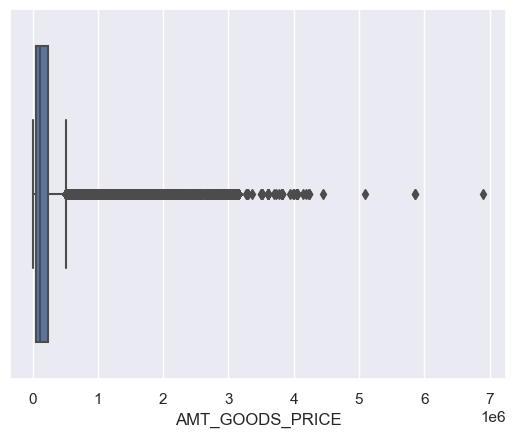

In [106]:
sns.boxplot(x=previous_app_data.AMT_GOODS_PRICE)
plt.show()

In [107]:
#Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn

previous_app_data.loc[previous_app_data['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = previous_app_data.AMT_GOODS_PRICE.median()

In [108]:
previous_app_data.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

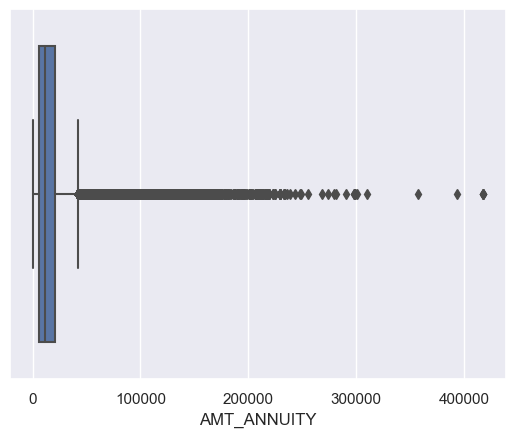

In [109]:
sns.boxplot(x=previous_app_data.AMT_ANNUITY)

In [110]:
# as we can observe the outliers in the  column, it's better to impute the values iwth the medan

previous_app_data.loc[previous_app_data['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = previous_app_data.AMT_ANNUITY.median()

In [111]:
previous_app_data.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

<AxesSubplot:xlabel='CNT_PAYMENT'>

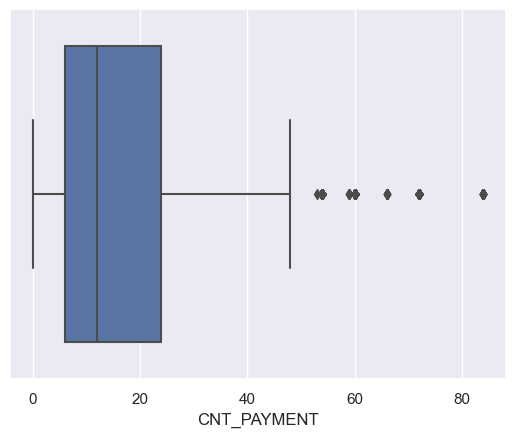

In [112]:
sns.boxplot(x=previous_app_data.CNT_PAYMENT)

In [113]:
# as we can observe the outliers in the  column, it's better to impute the values iwth the medan

previous_app_data.loc[previous_app_data['CNT_PAYMENT'].isnull(), 'CNT_PAYMENT'] = previous_app_data.CNT_PAYMENT.median()

In [114]:
(previous_app_data.isnull().mean()*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


In [115]:
previous_app_data.sample(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
181878,1207429,356363,Revolving loans,2250.000,45000.0,45000.0,45000.0,SATURDAY,12,Y,1,XAP,Approved,-369,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,72,Connectivity,0.0,XNA,Card Street
154311,1147639,161702,Consumer loans,5411.520,21105.0,18994.5,21105.0,SATURDAY,10,Y,1,XAP,Refused,-2552,Cash through the bank,SCO,Repeater,Mobile,POS,XNA,Country-wide,30,Connectivity,4.0,low_normal,POS mobile with interest
956863,1513799,192950,Consumer loans,8351.370,64260.0,62604.0,64260.0,SATURDAY,13,Y,1,XAP,Approved,-2301,XNA,XAP,Repeater,Mobile,POS,XNA,Country-wide,27,Connectivity,10.0,high,POS mobile with interest
1430076,1771673,142498,Cash loans,7056.810,112500.0,134775.0,112500.0,MONDAY,8,Y,1,Urgent needs,Refused,-245,Cash through the bank,HC,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,middle,Cash Street: middle
1276251,2021884,398339,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,13,Y,1,XNA,Canceled,-343,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
1621728,1160757,317307,Cash loans,15925.950,315000.0,439740.0,315000.0,TUESDAY,17,Y,1,XNA,Approved,-431,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
189974,2697104,343947,Cash loans,17803.035,360000.0,417100.5,360000.0,THURSDAY,10,Y,1,XNA,Approved,-1136,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,36.0,low_normal,Cash X-Sell: low
1362536,1302230,442268,Cash loans,14663.835,202500.0,229230.0,202500.0,FRIDAY,10,Y,1,XNA,Approved,-1083,XNA,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
715577,2207255,447824,Cash loans,46992.375,787500.0,841554.0,787500.0,MONDAY,10,Y,1,XNA,Approved,-661,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low
209142,1904519,160356,Cash loans,11250.000,0.0,0.0,112320.0,WEDNESDAY,10,Y,1,XNA,Canceled,-263,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash


In [116]:
### we can see that ome columns have XNA and XAP values, we can assume that the candidate did not prefer to provide the information

In [117]:
previous_app_data.shape

(1670214, 26)

## Merging the both dataframes

In [118]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AMT_INCOME_RANGE']

In [119]:
# Creating a dataset from current application for merging 
new_app_data_to_merge = new_app_data[cols_current]
new_app_data_to_merge.head()


,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_RANGE
0,100002,1,Male,Secondary / secondary special,Single / not married,200000-225000
1,100003,0,Female,Higher education,Married,250000-275000
2,100004,0,Male,Secondary / secondary special,Single / not married,50000-75000
3,100006,0,Female,Secondary / secondary special,Civil marriage,125000-150000
4,100007,0,Male,Secondary / secondary special,Single / not married,100000-125000


In [120]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [121]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = previous_app_data.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high


In [122]:
# Merging both the datasets
merged = pd.merge(df_prev_to_merge,new_app_data_to_merge, on='SK_ID_CURR', how='left')
merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_RANGE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,0.0,Female,Incomplete higher,Married,200000-225000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action,0.0,Female,Secondary / secondary special,Civil marriage,"75000,100000"
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,0.0,Female,Secondary / secondary special,Married,25000-50000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high,0.0,Female,Secondary / secondary special,Married,175000-200000


In [123]:
merged.shape

(1670214, 28)

In [124]:
len(merged[np.isnan(merged['TARGET'])])

532720

In [125]:
# removing the nan values
merged = merged[(~(np.isnan(merged['TARGET'])))]         


In [126]:
### UNIVARIATE ANALYSIS

[Text(0.5, 0, 'Loan status')]

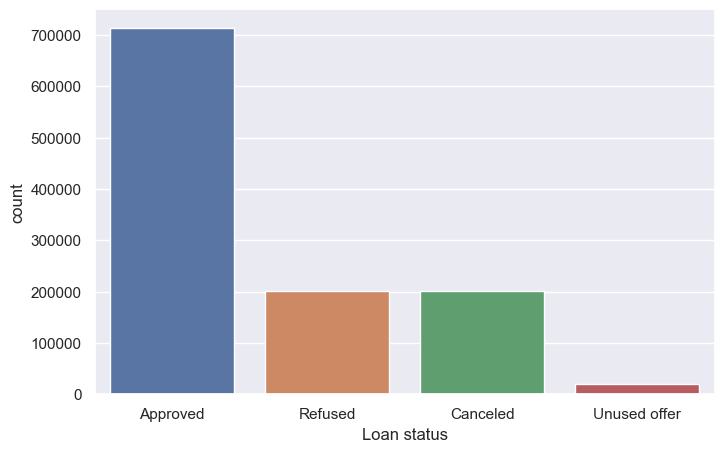

In [127]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=merged)
ax.set(xlabel='Loan status')

The number of Approved loans is great as compared to other

[Text(0.5, 0, 'Client type')]

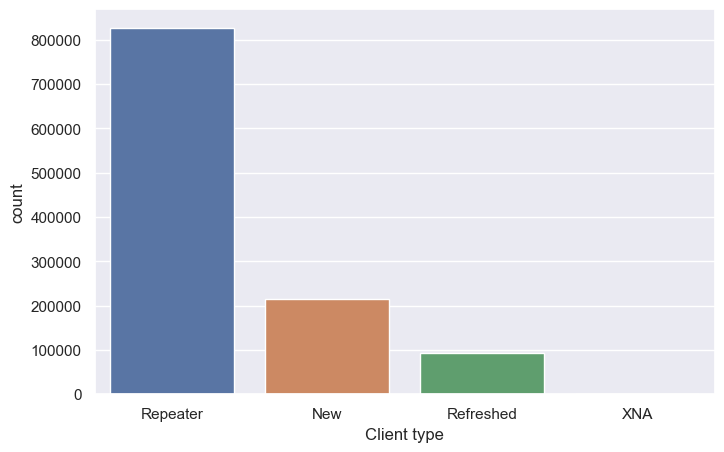

In [128]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=merged)
ax.set(xlabel='Client type')

We can observe that there is large amount of repeaters

[Text(0.5, 0, 'Portfolio')]

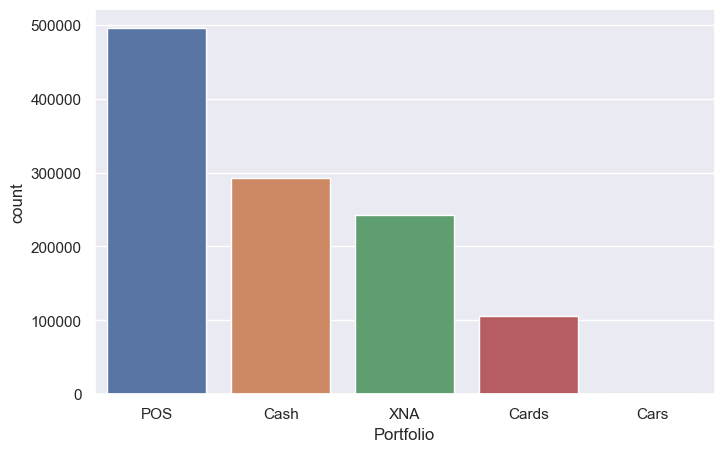

In [129]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=merged)
ax.set(xlabel='Portfolio')


Highest number of previous applicants were for POS

[Text(0.5, 0, 'Application channel')]

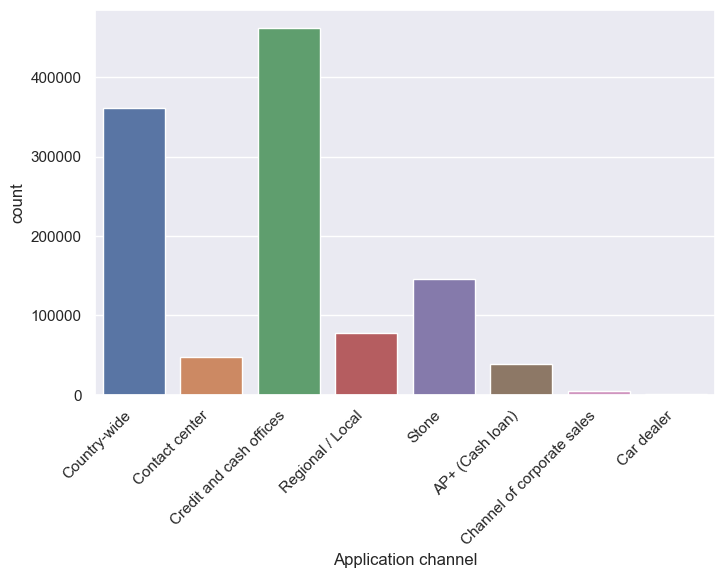

In [130]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

It can be observed that the credit and cash offices were widely used, followed by country-wide

In [ ]:
# Applied Loan Amount
plt.figure(figsize=(6,6))
ax = sns.distplot(merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

BIVARIATE ANALYSIS

In [ ]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']

In [ ]:
# Creating dataframe for numerical columns
merged_corr = merged[corr_cols]
merged_corr.head()

In [ ]:
merged_corr.corr()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(merged_corr.corr(),cmap="Greens",annot=True)

highly correlated


AMT_CREDIT and AMT_APPLICATION


AMT_CREDIT and AMT_ANNUITY


In [ ]:
#Current loan defaulter status with respect to previous loan application status and portfolio of the loan

In [ ]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Refused had more deaulters

In [ ]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Canceled applicants the Defaulters are more New clients.